In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from model_GD import LogisticRegression

/home/hoon/anaconda3/envs/ml-from-scratch/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
bc = datasets.load_breast_cancer()
x, y = bc.data, bc.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)


In [4]:
print(x_train.shape)

(455, 30)


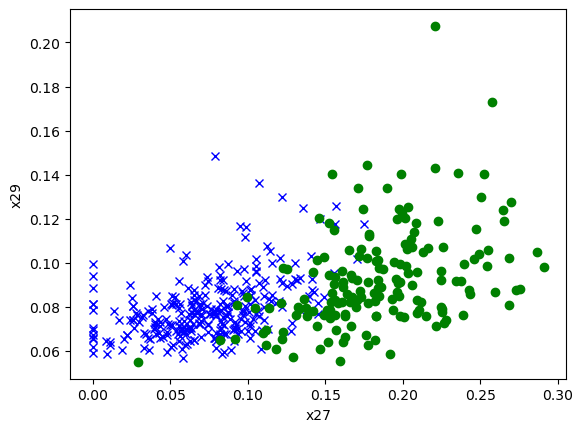

In [5]:
plt.xlabel('x27')
plt.ylabel('x29')
plt.plot(x_train[y_train == 1, 27], x_train[y_train == 1, 29], 'bx', linewidth=2)
plt.plot(x_train[y_train == 0, 27], x_train[y_train == 0, 29], 'go', linewidth=2)

In [6]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test) / len(y_test)

In [7]:
model = LogisticRegression(lr=0.3, eps=1.5)
model.fit(x_train, y_train)
class_pred = model.predict(x_test)
theta = model.theta

[1.77793353e-02 2.32481922e-02 1.16600295e-01 9.06391547e-01
 1.13820341e-04 1.40249482e-04 1.38649023e-04 7.52902519e-05
 2.13204106e-04 7.19249221e-05 5.59989615e-04 1.40985842e-03
 3.98370366e-03 6.13196421e-02 8.00683879e-06 3.28354691e-05
 4.20189596e-05 1.50879039e-05 2.31260128e-05 4.53308340e-06
 2.09760174e-02 3.13348823e-02 1.39548291e-01 1.27165772e+00
 1.58751610e-04 3.54421993e-04 4.08242991e-04 1.64952471e-04
 3.47518029e-04 1.00516411e-04]


0.6052631578947368
[1.77793353e-02 2.32481922e-02 1.16600295e-01 9.06391547e-01
 1.13820341e-04 1.40249482e-04 1.38649023e-04 7.52902519e-05
 2.13204106e-04 7.19249221e-05 5.59989615e-04 1.40985842e-03
 3.98370366e-03 6.13196421e-02 8.00683879e-06 3.28354691e-05
 4.20189596e-05 1.50879039e-05 2.31260128e-05 4.53308340e-06
 2.09760174e-02 3.13348823e-02 1.39548291e-01 1.27165772e+00
 1.58751610e-04 3.54421993e-04 4.08242991e-04 1.64952471e-04
 3.47518029e-04 1.00516411e-04]


(0.024548, 0.23799199999999998)

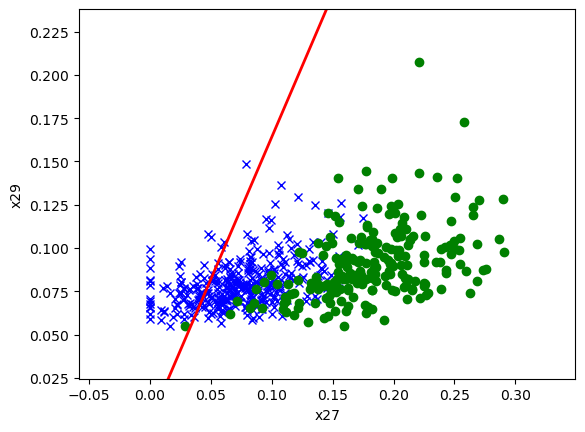

In [8]:
acc = accuracy(class_pred, y_test)
print(acc)
print(theta)
# Plot dataset
plt.figure()
plt.xlabel('x27')
plt.ylabel('x29')
plt.plot(x[y == 1, 27], x[y == 1, 29], 'bx', linewidth=2)
plt.plot(x[y == 0, 27], x[y == 0, 29], 'go', linewidth=2)

# Plot decision boundary (found by solving for theta^T x = 0)
margin27 = (max(x[:, 27]) - min(x[:, 27]))*0.2
margin29 = (max(x[:, 29]) - min(x[:, 29]))*0.2
x1 = np.arange(min(x[:, 27])-margin27, max(x[:, 27])+margin27, 0.01)
# x2 = -(theta[0] / theta[2] * correction + theta[1] / theta[2] * x1)
x2 = (theta[27] / theta[29]) * x1
plt.plot(x1, x2, c='red', linewidth=2)
plt.xlim(x[:, 27].min()-margin27, x[:, 27].max()+margin27)
plt.ylim(x[:, 29].min()-margin29, x[:, 29].max()+margin29)

# Add labels and save to disk
# plt.xlabel('x1')
# plt.ylabel('x2')
# if save_path is not None:
#     plt.savefig(save_path)